In [111]:
#import statements
import time

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split

from utils.LinearRegressionMetrics import linear_reg_metrics

sns.set_theme(color_codes=True)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
sns.set()
#note that for the figure size to show, this cell should be run
#separately from the import of pyplot
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 4)

# Autocorrelation Test on Large Sin dateset

In [63]:
lag = 200

Simulating sin data set with noise and drift

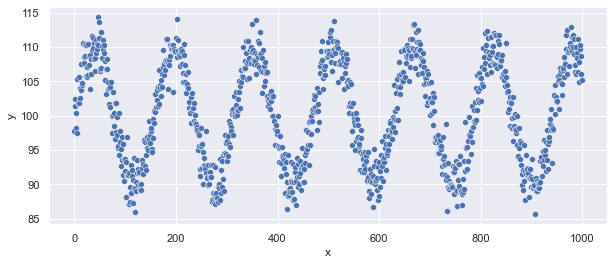

In [64]:
# Simulating sin data set with noise and drift
np.random.seed(123)
size = 1000
num= (np.sin(np.linspace(0,40,size))*10)+100
noise = np.random.normal(0,2,size)
df= pd.DataFrame({'y':num+noise})
df['x']= df.index
df.set_index('x',inplace=True)
# px.scatter(df,y=['y',])
_ = sns.scatterplot(data=df,y='y',x='x')

In [65]:
df

,y
x,
0,97.828739
1,102.394984
2,101.365902
3,98.185725
4,100.437563
...,...
995,109.688905
996,110.336479
997,106.142113


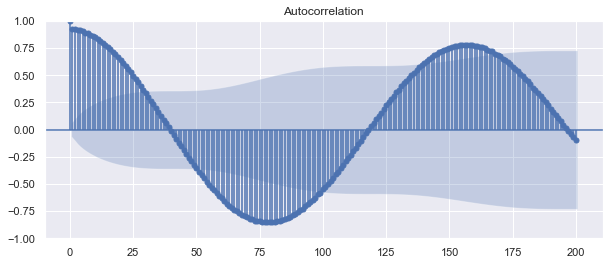

In [66]:
_=plot_acf(df['y'],lags=lag)

/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


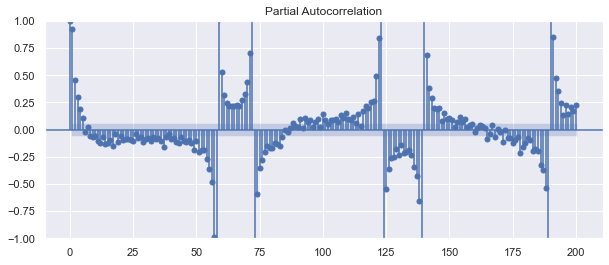

In [67]:
_=plot_pacf(df['y'],lags=lag)

In [68]:
#split data into train and test
train_df, test_df = train_test_split(df, test_size=0.2,shuffle=False)
train_df

,y
x,
0,97.828739
1,102.394984
2,101.365902
3,98.185725
4,100.437563
...,...
795,102.348893
796,106.226034
797,102.009991


In [72]:
AR_lag_p = 50
MA_lag_q = 0
model = ARIMA(train_df, order=(AR_lag_p,MA_lag_q,MA_lag_q))
start_time = time.time()
arma_fit = model.fit()
end_time = time.time()
print('Time taken to fit the model: {}'.format(end_time-start_time))
print(arma_fit.summary())


Time taken to fit the model: 115.85776782035828
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  800
Model:                ARIMA(50, 0, 0)   Log Likelihood               -1705.249
Date:                Sun, 24 Apr 2022   AIC                           3514.497
Time:                        20:10:11   BIC                           3758.097
Sample:                             0   HQIC                          3608.077
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0056      0.206    484.542      0.000      99.601     100.410
ar.L1          0.0950      0.038      2.471      0.013       0.020       0.170
ar.L

In [75]:
a = arma_fit.predict(start=800,end=1500)
a


800     104.865137
801     106.208739
802     105.837229
803     106.986631
804     107.012516
           ...    
1496     98.896398
1497     98.533414
1498     98.172968
1499     97.815635
1500     97.461985
Name: predicted_mean, Length: 701, dtype: float64

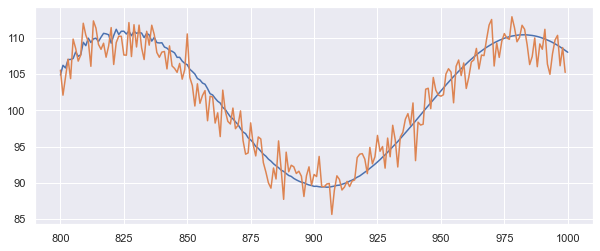

In [98]:
plt.plot(a[a.index<=1000])
# plt.plot(train_df['y'])
plt.plot(test_df['y'])

In [114]:
y_test = test_df['y']
y_pred = a[a.index<1000]
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:",r2_score(y_test, y_pred))

Mean Absolute Error: 1.6666115881471024
Root Mean Squared Error: 2.05628822255992
Coefficient of Determination: 0.9231035670043144
